In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the data
df = pd.read_csv('pre_melbourn.csv')
df.head()

,Suburb,Rooms,Type,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,1035000.0,4/02/2016,2.5,3067,2.0,1.0,0,156.0,1900.0,Yarra,Northern Metropolitan,4019
1,Abbotsford,3,h,1465000.0,4/03/2017,2.5,3067,3.0,2.0,0,134.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,4,h,1600000.0,4/06/2016,2.5,3067,3.0,1.0,2,120.0,2014.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,3,h,1876000.0,7/05/2016,2.5,3067,4.0,2.0,0,245.0,1910.0,Yarra,Northern Metropolitan,4019
4,Abbotsford,2,h,1636000.0,8/10/2016,2.5,3067,2.0,1.0,2,256.0,1890.0,Yarra,Northern Metropolitan,4019


In [2]:
df = pd.get_dummies(df, drop_first=True)

In [3]:
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Propertycount,...,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1035000.0,2.5,3067,2.0,1.0,0,156.0,1900.0,4019,...,False,True,False,False,True,False,False,False,False,False
1,3,1465000.0,2.5,3067,3.0,2.0,0,134.0,1900.0,4019,...,False,True,False,False,True,False,False,False,False,False
2,4,1600000.0,2.5,3067,3.0,1.0,2,120.0,2014.0,4019,...,False,True,False,False,True,False,False,False,False,False
3,3,1876000.0,2.5,3067,4.0,2.0,0,245.0,1910.0,4019,...,False,True,False,False,True,False,False,False,False,False
4,2,1636000.0,2.5,3067,2.0,1.0,2,256.0,1890.0,4019,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8199,4,1245000.0,16.7,3150,4.0,2.0,2,652.0,1981.0,7392,...,False,False,False,False,False,False,True,False,False,False
8200,3,1031000.0,6.8,3016,3.0,2.0,2,333.0,1995.0,6380,...,False,False,False,False,False,False,False,False,True,False
8201,3,1170000.0,6.8,3016,3.0,2.0,4,436.0,1997.0,6380,...,False,False,False,False,False,False,False,False,True,False
8202,4,2500000.0,6.8,3016,4.0,1.0,5,866.0,1920.0,6380,...,False,False,False,False,False,False,False,False,True,False


In [5]:
# great now we have the data, let's do some data preprocessing

X = df.drop(columns=['Price'],axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

#y_pred = model.predict(X_test)
#print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

RandomForestRegressor(random_state=0)

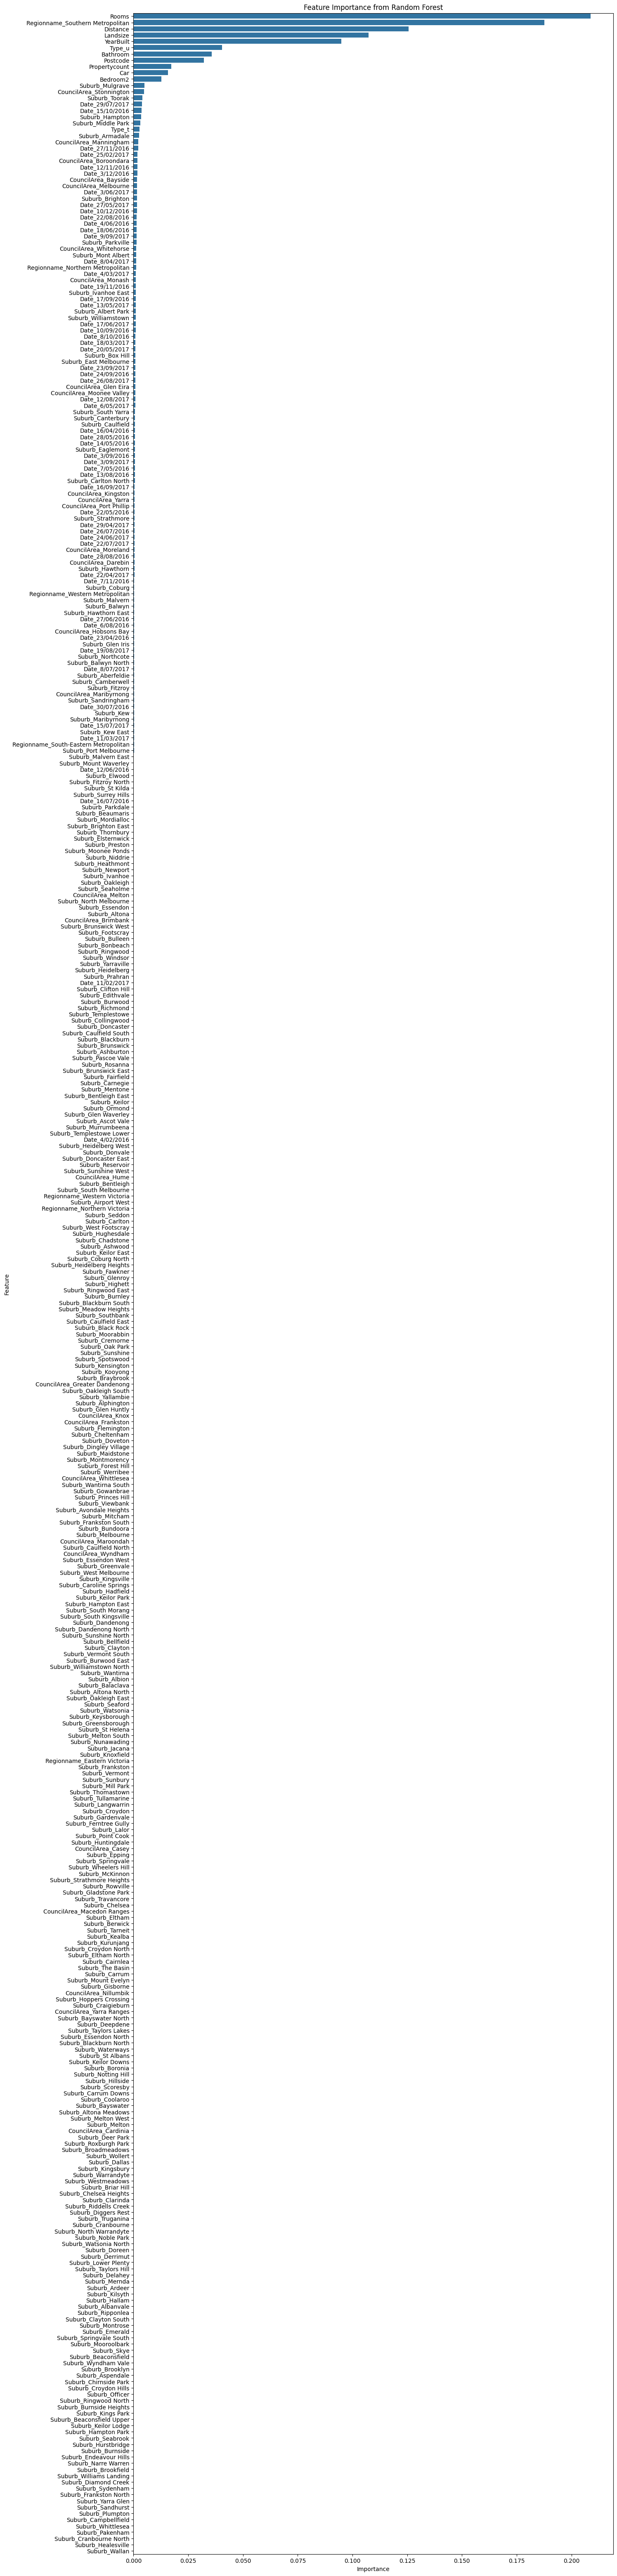

In [13]:
# Feature importance
importances = model.feature_importances_

features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 80))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()